In [238]:
import pandas as pd
import seaborn as sb
import numpy

In [239]:
df = pd.read_csv('C:\\csv-data-collect\\github-2023.csv',index_col=0)
df.duplicated().sum()
df.shape
df.head(1)

,id,full_name,url,clone_url,watchers_count,stargazers_count,language,forks,created_at,updated_at,pushed_at,description,languages_url,open_issues_count,topics,license
0,584145946,sumn2u/learn-javascript,https://github.com/sumn2u/learn-javascript,https://github.com/sumn2u/learn-javascript.git,619,619,HTML,29,2023-01-01T15:16:26Z,2023-06-16T03:16:58Z,2023-06-08T01:17:48Z,A book that teaches JavaScript,https://api.github.com/repos/sumn2u/learn-javascript/languages,1,"['beginner', 'beginner-friendly', 'book', 'collaborate', 'exercises', 'github', 'javascript', 'js', 'learn-javascript', 'learn-to-code', 'learning', 'open-source', 'programming', 'programming-language', 'student-vscode']","{'key': 'apache-2.0', 'name': 'Apache License 2.0', 'spdx_id': 'Apache-2.0', 'url': 'https://api.github.com/licenses/apache-2.0', 'node_id': 'MDc6TGljZW5zZTI='}"


In [259]:
df[df['license_name'].str.contains('')]

,id,full_name,url,clone_url,watchers_count,stargazers_count,language,forks,created_at,updated_at,pushed_at,description,languages_url,open_issues_count,topics,license,license_name


# <h4 style='color:red'>genrate license</h4>

In [260]:
import ast
for x in df['license']:
    if pd.notna(x):
        df['license_name'] = ast.literal_eval(x)['name']
    else:
        df['license_name'] = 'MIT license'

In [4]:
df.drop(columns=['watchers_count'],inplace=True)
df.head(1)

,id,full_name,url,clone_url,stargazers_count,language,forks,created_at,updated_at,pushed_at,description,languages_url,open_issues_count,topics,license
0,584145946,sumn2u/learn-javascript,https://github.com/sumn2u/learn-javascript,https://github.com/sumn2u/learn-javascript.git,619,HTML,29,2023-01-01T15:16:26Z,2023-06-16T03:16:58Z,2023-06-08T01:17:48Z,A book that teaches JavaScript,https://api.github.com/repos/sumn2u/learn-java...,1,"['beginner', 'beginner-friendly', 'book', 'col...","{'key': 'apache-2.0', 'name': 'Apache License ..."


# <h4 style='color:red'>drop Null Values from Language</h4>

In [5]:
null_language = df.loc[df['language'].isna()].index
df.drop(null_language,inplace=True)

# <h4 style='color:orange'>shape of df after remove the null from language </h4>

In [213]:
df.shape

(131106, 16)

# <h4 style='color:orange'>Outlier Values base on Number of Forks And Number stargazers</h4>

<Axes: >

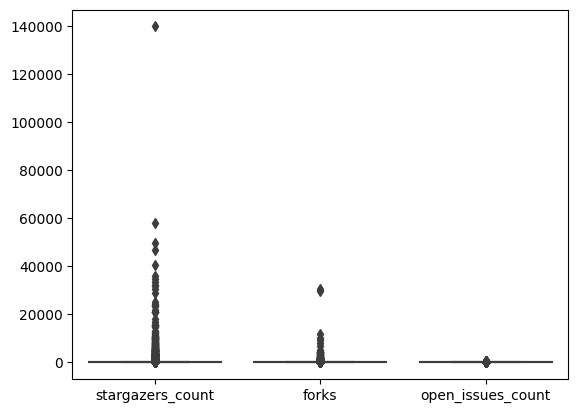

In [214]:
sb.boxplot(df[['stargazers_count','forks','open_issues_count']])

# <h4 style='color:orange'>Star gazers Outlier</h4>

In [215]:
Q1 = df['stargazers_count'].quantile(0.25)
Q3 = df['stargazers_count'].quantile(0.75)
IQR = Q3 - Q1


Lower_Whisker = Q1 - (1.5 * IQR)
Upper_Whisker = Q3 + (1.5 * IQR)

print(Lower_Whisker, Upper_Whisker)
df.shape
#df.shape
df_Q_Outliers_stargazers_count = df.loc[(df['stargazers_count'] < Lower_Whisker)|(df['stargazers_count'] > Upper_Whisker)]

-5.0 19.0


In [170]:
df_stargazers_count  = df.loc[(df['stargazers_count'] > Lower_Whisker)|(df['stargazers_count'] < Upper_Whisker)]

# <h4 style='color:orange'>Forks Outlier</h4>

In [216]:
Q1 = df['forks'].quantile(0.25)
Q3 = df['forks'].quantile(0.75)
IQR = Q3 - Q1


Lower_Whisker = Q1 - (1.5 * IQR)
Upper_Whisker = Q3 + (1.5 * IQR)

print(Lower_Whisker, Upper_Whisker)
df.shape
#df.shape
df_Q_Outliers_forks_count = df.loc[(df['forks'] < Lower_Whisker)|(df['forks'] > Upper_Whisker)]
df_without_outlier = df[df['forks'] < Upper_Whisker]
df_without_outlier

-3.0 5.0


,id,full_name,url,clone_url,watchers_count,stargazers_count,language,forks,created_at,updated_at,pushed_at,description,languages_url,open_issues_count,topics,license
16,584034634,TimMikeladze/gist-database,https://github.com/TimMikeladze/gist-database,https://github.com/TimMikeladze/gist-database.git,90,90,TypeScript,0,2023-01-01T02:34:59Z,2023-06-08T08:15:44Z,2023-06-03T03:35:29Z,✨ Transform gist into your personal key/value ...,https://api.github.com/repos/TimMikeladze/gist...,4,"['datastore', 'gist', 'gist-data', 'gist-datab...","{'key': 'mit', 'name': 'MIT License', 'spdx_id..."
24,584139370,corleytd/PyTorchBasic,https://github.com/corleytd/PyTorchBasic,https://github.com/corleytd/PyTorchBasic.git,80,80,Python,1,2023-01-01T14:45:07Z,2023-05-23T23:38:01Z,2023-01-13T04:55:20Z,This repository provides tutorial for deep lea...,https://api.github.com/repos/corleytd/PyTorchB...,0,[],NaN
26,584172068,avialxee/scoobi,https://github.com/avialxee/scoobi,https://github.com/avialxee/scoobi.git,70,70,Python,2,2023-01-01T17:27:36Z,2023-05-26T09:16:39Z,2023-05-24T19:54:48Z,Solar Conventionality-based Organizing Observa...,https://api.github.com/repos/avialxee/scoobi/l...,0,[],"{'key': 'bsd-3-clause', 'name': 'BSD 3-Clause ..."
34,584167315,zmedelis/bosquet,https://github.com/zmedelis/bosquet,https://github.com/zmedelis/bosquet.git,54,54,Clojure,3,2023-01-01T17:03:29Z,2023-06-12T22:27:47Z,2023-06-15T06:14:57Z,"LLMOps tools to build, chain, evaluate and dep...",https://api.github.com/repos/zmedelis/bosquet/...,5,"['clojure', 'gpt', 'llmops', 'prompt', 'prompt...","{'key': 'epl-1.0', 'name': 'Eclipse Public Lic..."
36,584079348,dai-shi/valtio-signal,https://github.com/dai-shi/valtio-signal,https://github.com/dai-shi/valtio-signal.git,53,53,TypeScript,0,2023-01-01T08:48:12Z,2023-05-25T06:33:00Z,2023-02-25T23:43:39Z,Another React binding for Valtio proxy state,https://api.github.com/repos/dai-shi/valtio-si...,1,[],"{'key': 'mit', 'name': 'MIT License', 'spdx_id..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149994,647248273,vaniacrist/tabuada-portugol,https://github.com/vaniacrist/tabuada-portugol,https://github.com/vaniacrist/tabuada-portugol...,2,2,Portugol,0,2023-05-30T11:26:36Z,2023-06-13T14:09:54Z,2023-05-30T14:58:11Z,NaN,https://api.github.com/repos/vaniacrist/tabuad...,0,[],NaN
149995,647053735,diegohap/ej_JAVA_Egg_basic,https://github.com/diegohap/ej_JAVA_Egg_basic,https://github.com/diegohap/ej_JAVA_Egg_basic.git,2,2,Java,1,2023-05-30T00:57:42Z,2023-06-06T00:59:46Z,2023-06-13T22:16:50Z,NaN,https://api.github.com/repos/diegohap/ej_JAVA_...,0,[],NaN
149996,647050210,BOWSTRINGHERO/Java_Example,https://github.com/BOWSTRINGHERO/Java_Example,https://github.com/BOWSTRINGHERO/Java_Example.git,2,2,Java,0,2023-05-30T00:41:42Z,2023-05-31T05:40:45Z,2023-06-16T03:25:53Z,NaN,https://api.github.com/repos/BOWSTRINGHERO/Jav...,0,[],NaN
149997,647350670,wasix-org/dash,https://github.com/wasix-org/dash,https://github.com/wasix-org/dash.git,2,2,C,0,2023-05-30T15:33:39Z,2023-05-30T18:19:52Z,2023-05-30T15:34:10Z,Dash on Webassembly with WASIX,https://api.github.com/repos/wasix-org/dash/la...,0,[],"{'key': 'other', 'name': 'Other', 'spdx_id': '..."


In [217]:
print(df_Q_Outliers_stargazers_count.loc[df_Q_Outliers_stargazers_count['language'] == 'TypeScript'].shape)
print(df_Q_Outliers_forks_count.loc[df_Q_Outliers_forks_count['language'] == 'TypeScript'].shape)

(2109, 16)
(1378, 16)


(116197, 16)

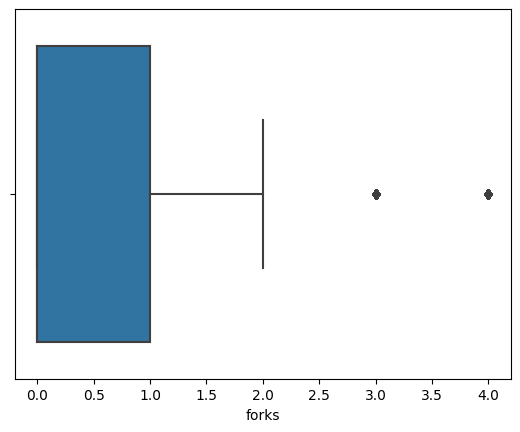

In [222]:
import seaborn as sns
sns.boxplot(data=df_without_outlier,x=df_without_outlier['forks'])
df_without_outlier.shape

In [240]:
df.loc[df['stargazers_count'] >= 100].shape

(4725, 16)

In [34]:
df.loc[df['language'].str.contains('Rich')]

,id,full_name,url,clone_url,stargazers_count,language,forks,created_at,updated_at,pushed_at,description,languages_url,open_issues_count,topics,license
3198,585221689,Probesys/lotemplate,https://github.com/Probesys/lotemplate,https://github.com/Probesys/lotemplate.git,13,Rich Text Format,1,2023-01-04 16:14:54+00:00,2023-06-05 07:08:16+00:00,2023-06-09 07:24:24+00:00,LOTemplateFiller is a script that fills a give...,https://api.github.com/repos/Probesys/lotempla...,0,"['document-generator', 'libreoffice', 'text-do...","{'key': 'agpl-3.0', 'name': 'GNU Affero Genera..."
9108,587166668,wace-vault/collection,https://github.com/wace-vault/collection,https://github.com/wace-vault/collection.git,32,Rich Text Format,19,2023-01-10 05:35:43+00:00,2023-06-14 02:20:17+00:00,2023-06-15 02:17:41+00:00,Monorepo containing resources and associated D...,https://api.github.com/repos/wace-vault/collec...,5,[],NaN
10637,587707946,BennyLinntu/ParticleSwarmOptimization,https://github.com/BennyLinntu/ParticleSwarmOp...,https://github.com/BennyLinntu/ParticleSwarmOp...,5,Rich Text Format,0,2023-01-11 11:54:23+00:00,2023-01-11 15:00:05+00:00,2023-01-11 11:54:28+00:00,"In computational science, particle swarm optim...",https://api.github.com/repos/BennyLinntu/Parti...,0,[],NaN
16125,589940081,MakeMagazinDE/3-in-1-Werkbank,https://github.com/MakeMagazinDE/3-in-1-Werkbank,https://github.com/MakeMagazinDE/3-in-1-Werkba...,23,Rich Text Format,6,2023-01-17 09:52:13+00:00,2023-05-13 05:11:11+00:00,2023-01-26 14:50:28+00:00,NaN,https://api.github.com/repos/MakeMagazinDE/3-i...,0,[],NaN
17272,590585403,csun22/LibriVoc-Dataset,https://github.com/csun22/LibriVoc-Dataset,https://github.com/csun22/LibriVoc-Dataset.git,10,Rich Text Format,1,2023-01-18 18:45:57+00:00,2023-05-29 14:15:54+00:00,2023-01-24 15:38:43+00:00,"LibriVoc is a new open-source, large-scale dat...",https://api.github.com/repos/csun22/LibriVoc-D...,0,[],NaN
18563,591108006,raeytype/geez-handwriting-fonts,https://github.com/raeytype/geez-handwriting-f...,https://github.com/raeytype/geez-handwriting-f...,5,Rich Text Format,0,2023-01-19 23:48:04+00:00,2023-05-19 04:56:38+00:00,2023-01-28 18:34:17+00:00,Geʾez Handwriting Fonts,https://api.github.com/repos/raeytype/geez-han...,0,[],"{'key': 'other', 'name': 'Other', 'spdx_id': '..."
34118,597552656,Spirit30/FFmpegUnityBind2,https://github.com/Spirit30/FFmpegUnityBind2,https://github.com/Spirit30/FFmpegUnityBind2.git,22,Rich Text Format,7,2023-02-04 22:12:16+00:00,2023-06-13 20:29:20+00:00,2023-02-04 23:23:37+00:00,NaN,https://api.github.com/repos/Spirit30/FFmpegUn...,0,[],"{'key': 'apache-2.0', 'name': 'Apache License ..."
38335,599154900,csev/ca4e,https://github.com/csev/ca4e,https://github.com/csev/ca4e.git,9,Rich Text Format,0,2023-02-08 15:09:52+00:00,2023-06-15 18:56:22+00:00,2023-03-06 18:23:07+00:00,Computer Architecure for Everybody,https://api.github.com/repos/csev/ca4e/languages,0,[],NaN
39229,599362387,HappyDream0317/NiceHashMiner,https://github.com/HappyDream0317/NiceHashMiner,https://github.com/HappyDream0317/NiceHashMine...,14,Rich Text Format,0,2023-02-09 01:15:51+00:00,2023-06-15 06:51:25+00:00,2023-02-09 01:17:32+00:00,NaN,https://api.github.com/repos/HappyDream0317/Ni...,0,[],"{'key': 'other', 'name': 'Other', 'spdx_id': '..."
44944,601735172,harsh-kmr/verilog_experiments,https://github.com/harsh-kmr/verilog_experiments,https://github.com/harsh-kmr/verilog_experimen...,3,Rich Text Format,0,2023-02-14 17:52:05+00:00,2023-03-15 17:22:37+00:00,2023-02-14 18:28:02+00:00,This repository is created for VLSI Experiment...,https://api.github.com/repos/harsh-kmr/verilog...,0,"['hdl', 'semester5', 'verilog', 'vlsi', 'vlsi-...",NaN


In [133]:
pd.set_option('display.max_colwidth',None)
df.loc[df['language'] == 'Java']['url']

20            https://github.com/cloudclientdev/cloudclient
32                      https://github.com/FredyJabe/aeyama
48           https://github.com/giibeom/project-NMJ-renewal
85                        https://github.com/He0306/meeting
86          https://github.com/abarcomb-work/ENSF380-WS2023
                                ...                        
149948        https://github.com/TiAmoJIA/JobRecommendation
149971    https://github.com/NonEuclideanDreamer/Refraction
149979                   https://github.com/DasBrain/lamarr
149995        https://github.com/diegohap/ej_JAVA_Egg_basic
149996        https://github.com/BOWSTRINGHERO/Java_Example
Name: url, Length: 6351, dtype: object

# <h4 style='color:orange'>convert time for creation & updated & pushed date</h4>

In [73]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['updated_at'] = pd.to_datetime(df['updated_at'])
df['pushed_at'] = pd.to_datetime(df['pushed_at'])
print('\x1b[31m\"created:--------------------------------\"\x1b[0m')
print(df['created_at'].head(2))
print('\x1b[31m\"updated:--------------------------------\"\x1b[0m')
print(df['updated_at'].head(2))
print('\x1b[31m\"pushed:--------------------------------\"\x1b[0m')
print(df['pushed_at'].head(2))

"created:--------------------------------"
0   2023-01-01 15:16:26+00:00
2   2023-01-01 18:55:44+00:00
Name: created_at, dtype: datetime64[ns, UTC]
"updated:--------------------------------"
0   2023-06-16 03:16:58+00:00
2   2023-06-16 09:45:30+00:00
Name: updated_at, dtype: datetime64[ns, UTC]
"pushed:--------------------------------"
0   2023-06-08 01:17:48+00:00
2   2023-06-16 08:38:14+00:00
Name: pushed_at, dtype: datetime64[ns, UTC]


In [23]:
df['language'].unique().tolist()

['HTML',
 'TypeScript',
 'Python',
 'JavaScript',
 'Jupyter Notebook',
 'C',
 'Go',
 'C#',
 'Kotlin',
 'Java',
 'Dart',
 'Vue',
 'YARA',
 'Clojure',
 'Rust',
 'F#',
 'C++',
 'Lua',
 'Shell',
 'V',
 'CSS',
 'PHP',
 'Solidity',
 'Nim',
 'Emacs Lisp',
 'Nix',
 'PowerShell',
 'Makefile',
 'Swift',
 'Zig',
 'Haxe',
 'MATLAB',
 'nesC',
 'TeX',
 'Scala',
 'Pascal',
 'R',
 'Haskell',
 'Astro',
 'Vim Script',
 'HLSL',
 'SystemVerilog',
 'Verilog',
 'TSQL',
 'Common Lisp',
 'Svelte',
 'SCSS',
 'GLSL',
 'PLpgSQL',
 'EJS',
 'Raku',
 'QML',
 'Apex',
 'Jinja',
 'Visual Basic 6.0',
 'RobotFramework',
 'Ruby',
 'HCL',
 'Mathematica',
 'Batchfile',
 'Assembly',
 'OCaml',
 'Cairo',
 'Smarty',
 'Julia',
 'Macaulay2',
 'PureScript',
 'Stylus',
 'XS',
 'Dockerfile',
 'Roff',
 'CodeQL',
 'Nunjucks',
 'Mustache',
 'GDScript',
 'ReScript',
 'Move',
 'ZenScript',
 'Handlebars',
 'Perl',
 'AutoHotkey',
 'ShaderLab',
 'ASL',
 'Forth',
 'PLSQL',
 'Blade',
 'Inno Setup',
 'Elixir',
 'ASP.NET',
 'Scheme',
 'VBA',
 

# <ul>
# <li  style='color:crimson;font-size:20px'>Identify the problem: </li>
# <li  style='color:crimson;font-size:20px'>Create a plan:</li>
# <li  style='color:crimson;font-size:20px'>Remove duplicates:</li>
# <li  style='color:crimson;font-size:20px'>Handle missing values:</li>
# <li  style='color:crimson;font-size:20px'>Correct errors: </li>
# <li  style='color:crimson;font-size:20px'>Standardize formats:</li>
# <li  style='color:crimson;font-size:20px'>Check for outliers: </li>
# <li  style='color:crimson;font-size:20px'>Validate cleaned data: </li>
# </ul>

# <img src='https://cdn.discordapp.com/attachments/1108844855867736096/1121018951875436674/roadmap.png' />
#

In [261]:
df.dtypes

id                    int64
full_name            object
url                  object
clone_url            object
watchers_count        int64
stargazers_count      int64
language             object
forks                 int64
created_at           object
updated_at           object
pushed_at            object
description          object
languages_url        object
open_issues_count     int64
topics               object
license              object
license_name         object
dtype: object